## Import required python packages

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## Load the csv data

In [2]:
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Removal of unwanted columns
1. instant: Record index does not have any effect on the prediction of target variable
2. Casual & registered: Target is to predict the total count of the bike users, so casual and registered columns are not required     
3. dteday: Date variable does not have any effect on prediction of the target variable

In [3]:
bike_data = bike_data.drop(["instant", "casual", "registered", "dteday"], axis=1)

In [4]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
bike_data.shape

(730, 12)

In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [7]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Pair plot the data for visualization 

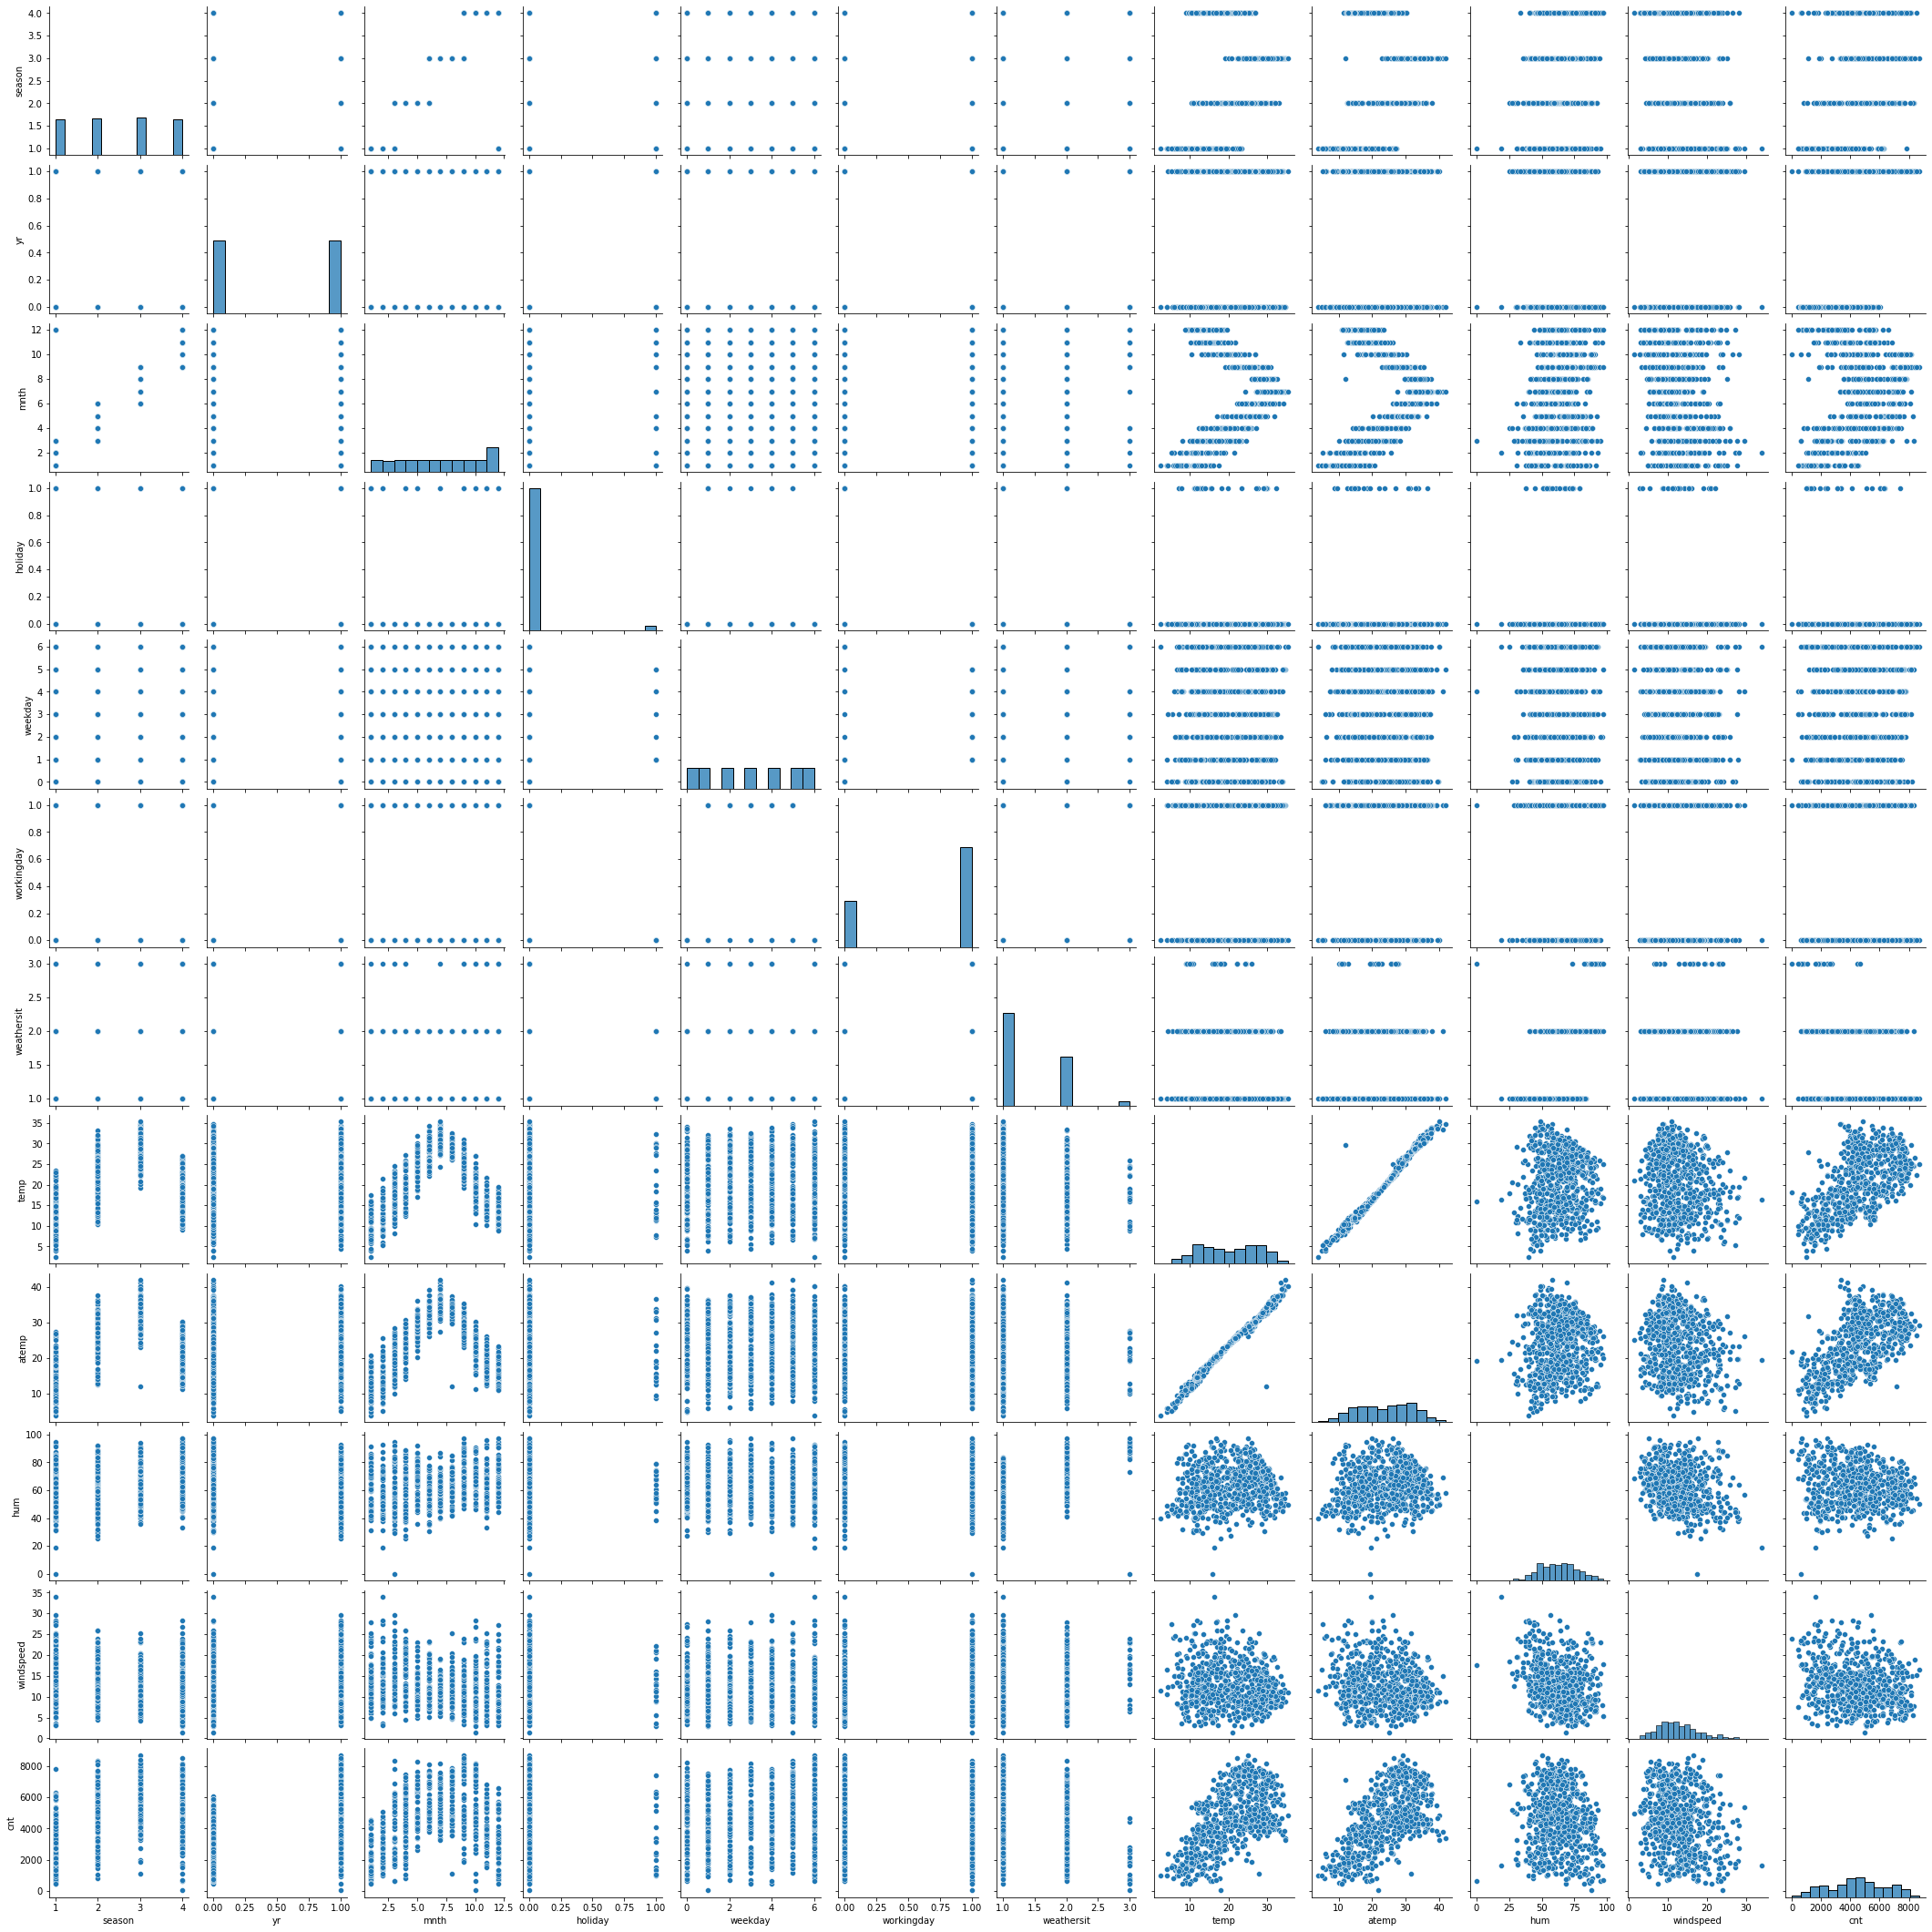

In [8]:
sns.pairplot(bike_data)

## Visualise categorical variables against ride count

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

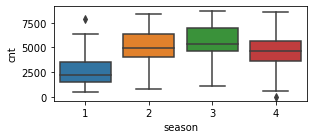

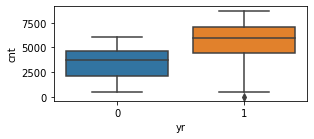

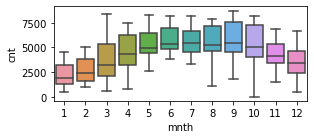

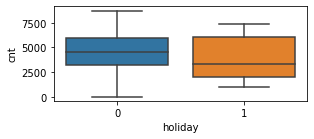

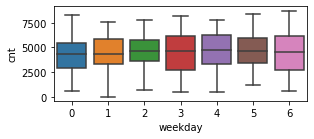

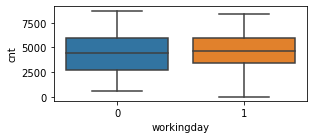

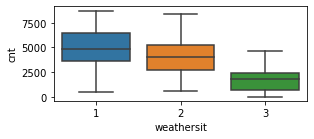

In [9]:
plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 1)
sns.boxplot(x='season', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 2)
sns.boxplot(x='yr', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_data)

plt.figure(figsize=(10, 8))
plt.subplot(4, 2, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_data)


## Convert categorical variables weathersit, weekday, month, season to dummy variables

In [11]:
weather_dummies = pd.get_dummies(bike_data.weathersit, drop_first=True) 
weather_dummies = weather_dummies.rename(columns={1: "clear", 2: "mist", 3: "snow"})
weather_dummies

,mist,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


## Concat weather_dummies with main data frame

In [12]:
bike_data = pd.concat([bike_data, weather_dummies], axis = 1)
bike_data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mist,snow
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114,1,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095,1,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341,1,0
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796,0,0


## Drop weathersit columns

In [13]:
bike_data = bike_data.drop(["weathersit"], axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,mist,snow
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


## Get dummy variables for weekday

In [14]:
weekday_dummies = pd.get_dummies(bike_data.weekday)
weekday_dummies = weekday_dummies.rename(columns={0:"sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday"})
weekday_dummies.head()

,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


## concat weekday_dummies with bike_data df and drop weekday column

In [15]:
bike_data = pd.concat([bike_data, weekday_dummies], axis=1)
bike_data = bike_data.drop(["weekday"], axis=1)
bike_data.head()

,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,snow,sunday,monday,tuesday,wednesday,thursday,friday,saturday
0,1,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,1
1,1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0,0,0,0,0
2,1,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0
4,1,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0


## Get dummy variables for season

In [16]:
season_dummies = pd.get_dummies(bike_data.season, drop_first=True)
season_dummies = season_dummies.rename(columns={2:"summer", 3: "fall", 4: "winter"})
season_dummies.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


## concat the season_dummies with bike_data and drop the season column

In [17]:
bike_data = pd.concat([bike_data, season_dummies], axis=1)
bike_data = bike_data.drop(["season"], axis=1)
bike_data.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,...,sunday,monday,tuesday,wednesday,thursday,friday,saturday,summer,fall,winter
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,1,0,0,0,0,0,0


## Plot heatmap to find out co-relation 

<AxesSubplot:>

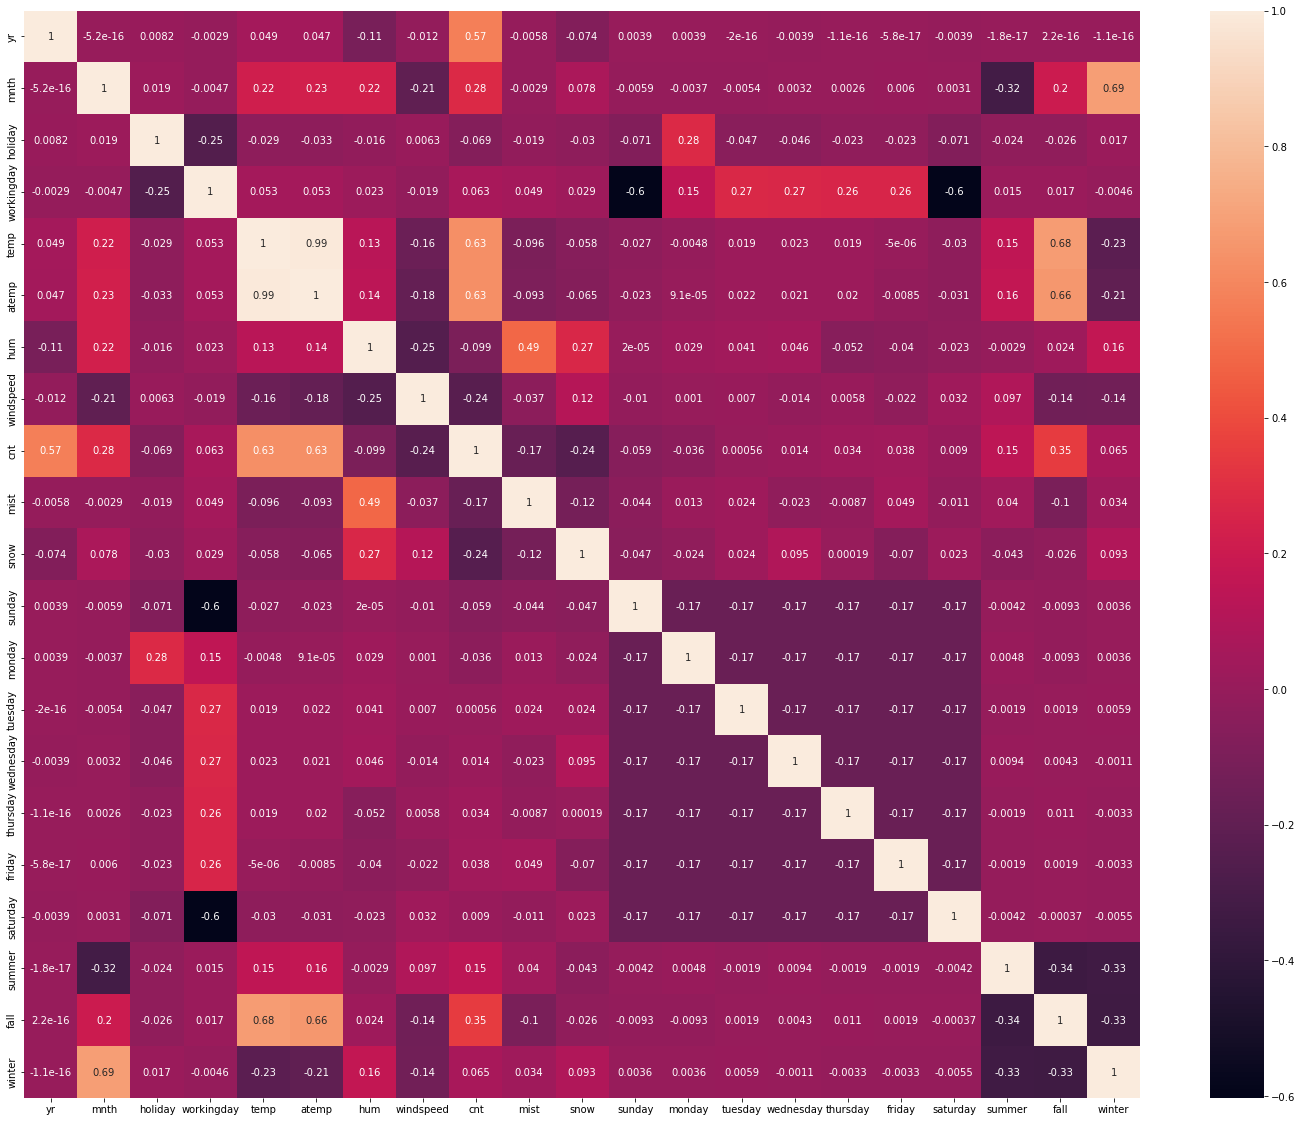

In [35]:
plt.figure(figsize=(25,20))
sns.heatmap(bike_data.corr(), annot=True)

## split the data set into train(70%) and test(30%) sets

In [22]:
bike_data_train, bike_data_test = train_test_split(bike_data, train_size=0.7, random_state=100)
print(bike_data_train.shape)
print(bike_data_test.shape)

(510, 21)
(220, 21)


## scaling the data using MinMaxScaler

In [28]:
# 1. Instantiate the scaler
scaler = MinMaxScaler()

# 2. list the numeric columns
numeric_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]

# 3. fit_transform the data
bike_data_train[numeric_cols] = scaler.fit_transform(bike_data_train[numeric_cols])
bike_data_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,mist,...,sunday,monday,tuesday,wednesday,thursday,friday,saturday,summer,fall,winter
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,1,0,0,0,0,0,1,0
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,0,0,0,0,1,0,0,0
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,1,0,0,0,0,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,...,0,0,0,0,0,0,1,1,0,0
111,0,4,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,...,0,0,0,0,0,1,0,1,0,0


In [36]:
# X_bike_data_train, y_bike_data_train

y_bike_data_train = bike_data_train.pop("cnt")
X_bike_data_train = bike_data_train
y_bike_data_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

## Create and train the model

In [41]:
lm = LinearRegression()
lm.fit(X_bike_data_train, y_bike_data_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_bike_data_train, y_bike_data_train)

In [43]:
list(zip(X_bike_data_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('sunday', True, 1),
 ('monday', True, 1),
 ('tuesday', False, 2),
 ('wednesday', False, 4),
 ('thursday', False, 5),
 ('friday', False, 3),
 ('saturday', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

## columns supported by model 

In [44]:
col = X_bike_data_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'mist', 'snow', 'sunday', 'monday', 'saturday', 'summer', 'fall',
       'winter'],
      dtype='object')

## Columns dropped by model

In [45]:
X_bike_data_train.columns[~rfe.support_]

Index(['mnth', 'tuesday', 'wednesday', 'thursday', 'friday'], dtype='object')

## Print OLS Regression summary for column selections 

In [47]:
X_bike_data_train_rfe = X_bike_data_train[col]

import statsmodels.api as sm
X_bike_data_train_rfe = sm.add_constant(X_bike_data_train_rfe)

In [49]:
lm = sm.OLS(y_bike_data_train, X_bike_data_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.6
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          3.86e-182
Time:                        23:16:49   Log-Likelihood:                 495.53
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     495   BIC:                            -897.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1503      0.023      6.620      0.0

## p value of atemp variable is very high so let's drop it

In [50]:
X_bike_data_train_rfe = X_bike_data_train_rfe.drop("atemp", axis=1)

In [51]:
import statsmodels.api as sm
X_bike_data_train_rfe = sm.add_constant(X_bike_data_train_rfe)

In [52]:
lm = sm.OLS(y_bike_data_train, X_bike_data_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.89e-183
Time:                        23:20:48   Log-Likelihood:                 495.48
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     496   BIC:                            -903.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1506      0.023      6.646      0.0

## p value of holiday variable is very high so let's drop it

In [54]:
X_bike_data_train_rfe = X_bike_data_train_rfe.drop("holiday", axis=1)


In [60]:
import statsmodels.api as sm
X_bike_data_train_rfe = sm.add_constant(X_bike_data_train_rfe)

In [59]:
lm = sm.OLS(y_bike_data_train, X_bike_data_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.5
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          2.89e-183
Time:                        23:24:32   Log-Likelihood:                 495.48
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     496   BIC:                            -903.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1362      0.038      3.547      0.0

## P value of sunday and monday variable is also very high, so lets drop them

In [61]:
X_bike_data_train_rfe = X_bike_data_train_rfe.drop(["sunday", "monday"], axis=1)

In [62]:
import statsmodels.api as sm
X_bike_data_train_rfe = sm.add_constant(X_bike_data_train_rfe)

In [63]:
lm = sm.OLS(y_bike_data_train, X_bike_data_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Fri, 14 Oct 2022   Prob (F-statistic):          9.49e-185
Time:                        23:28:59   Log-Likelihood:                 493.42
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     498   BIC:                            -912.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1635      0.029      5.555      0.0

In [72]:
X_bike_data_train_rfe

,const,yr,workingday,temp,hum,windspeed,mist,snow,saturday,summer,fall,winter
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,1,1,0,0
111,1.0,0,1,0.345824,0.751824,0.380981,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.679690,0.187140,0,0,0,0,1,0
53,1.0,0,1,0.202618,0.435939,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,1,0,1,0,0,1
79,1.0,0,1,0.462664,0.759870,0.529881,1,0,0,1,0,0


## Model is trained now let's predict the count 

In [65]:
y_bike_data_predict = lm.predict(X_bike_data_train_rfe)

# Residual Analysis
## Plot the difference between actual count vs predicted count 

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


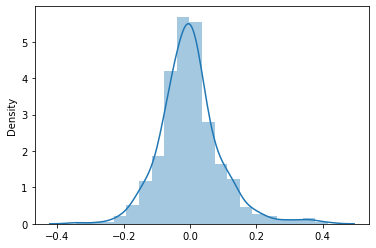

In [67]:

sns.distplot((y_bike_data_predict-y_bike_data_train), bins = 20)
plt.show()

## Plot scatter plot of predicted output and training output

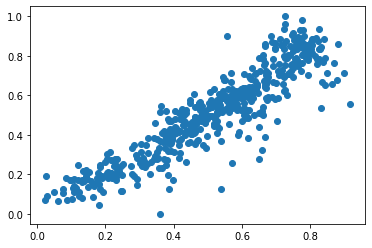

In [87]:
plt.scatter(y_bike_data_predict, y_bike_data_train)

# Test the model on test data

In [71]:
bike_data_test[numeric_cols] = scaler.transform(bike_data_test[numeric_cols])

In [73]:
y_bike_data_test = bike_data_test.pop("cnt")
X_bike_data_test = bike_data_test
X_bike_data_test

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,mist,snow,sunday,monday,tuesday,wednesday,thursday,friday,saturday,summer,fall,winter
184,0,7,1,0,0.831783,0.769660,0.657364,0.084219,1,0,0,1,0,0,0,0,0,0,1,0
535,1,6,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,0,0,1,0,0,0,1,0,0
299,0,10,0,1,0.511964,0.496145,0.837699,0.334206,1,0,0,0,0,0,1,0,0,0,0,1
221,0,8,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,1,0,0,0,0,1,0
152,0,6,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,12,0,1,0.519232,0.511907,0.756118,0.283397,0,0,0,0,1,0,0,0,0,0,0,1
127,0,5,0,0,0.584649,0.577380,0.650923,0.069510,0,0,1,0,0,0,0,0,0,1,0,0
640,1,10,0,1,0.745598,0.682653,0.817947,0.052115,1,0,0,0,0,1,0,0,0,0,0,1
72,0,3,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,1,0,0,0,0,0,0,0,0


## Remove unwanted columns from X_bike_data_test

In [77]:
cols = X_bike_data_train_rfe.columns
cols = cols.drop("const")
X_bike_data_test = X_bike_data_test[cols]
X_bike_data_test 

,yr,workingday,temp,hum,windspeed,mist,snow,saturday,summer,fall,winter
184,0,0,0.831783,0.657364,0.084219,1,0,0,0,1,0
535,1,1,0.901354,0.610133,0.153728,0,0,0,1,0,0
299,0,1,0.511964,0.837699,0.334206,1,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0,0,0,0,1,0
152,0,1,0.817246,0.314298,0.537414,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1,1,0.519232,0.756118,0.283397,0,0,0,0,0,1
127,0,0,0.584649,0.650923,0.069510,0,0,0,1,0,0
640,1,1,0.745598,0.817947,0.052115,1,0,0,0,0,1
72,0,1,0.331557,0.512107,0.203418,0,0,0,0,0,0


In [78]:
X_bike_data_test_sm = sm.add_constant(X_bike_data_test)
y_bike_data_test_predict = lm.predict(X_bike_data_test_sm)
y_bike_data_test_predict

184    0.494210
535    0.906786
299    0.408708
221    0.610143
152    0.602122
         ...   
702    0.719221
127    0.475325
640    0.809533
72     0.278364
653    0.734658
Length: 220, dtype: float64

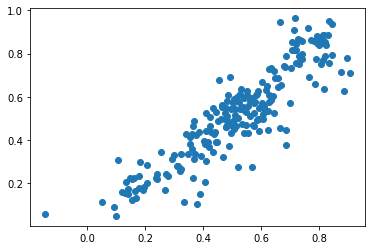

In [80]:
plt.scatter(y_bike_data_test_predict, y_bike_data_test)
plt.show()

## R2 analysis

In [81]:
from sklearn.metrics import r2_score
r2_score(y_bike_data_test, y_bike_data_test_predict)

0.806204217611896

/Users/i550019/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

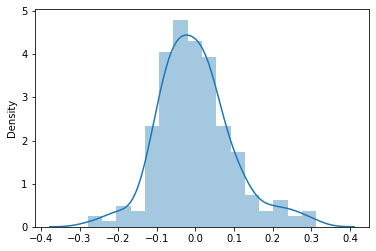